# 1.  Data analysis

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# working direc
print(os.getcwd())

/Users/dongwook/Desktop/Project/Plant_Seeding


### 1.1 class analysis

In [3]:
predict_csv_path = './sample_submission.csv'
train_data_path = './plant-seedlings-classification/train/'
test_data_path = './plant-seedlings-classification/test/'

total_img=0
# class checking
for name in os.listdir(train_data_path):
    path, dirs, files = next(os.walk(train_data_path+'/'+name))
    file_count = len(files)
    print(f'{name} : {file_count}')
    total_img=total_img+file_count
print(f'number_of_total_img : {total_img}')

Cleavers : 287
Sugar beet : 385
Common Chickweed : 611
Loose Silky-bent : 654
Scentless Mayweed : 516
Shepherds Purse : 231
Fat Hen : 475
Common wheat : 221
Black-grass : 263
Small-flowered Cranesbill : 496
Charlock : 390
Maize : 221
number_of_total_img : 4750


### 1.2 Getting mean and std of Images for Normalization

In [4]:
import torchvision
import torch
#random seed = 10

torch.manual_seed(10)
dataset = torchvision.datasets.ImageFolder(train_data_path)
train_count = int(0.8*len(dataset))
valid_count = len(dataset)-train_count
train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [train_count, valid_count])

In [29]:
def get_mean_std(dataset):
    meanRGB = [np.mean(np.array(image), axis=(1,2)) for image,_ in dataset]
    stdRGB = [np.std(np.array(image), axis=(1,2)) for image,_ in dataset]
    
    meanR = np.mean([round(m[0],3) for m in meanRGB])/255
    meanG = np.mean([round(m[1],3) for m in meanRGB])/255
    meanB = np.mean([round(m[2],3) for m in meanRGB])/255
    stdR = np.mean([round(s[0],3) for s in stdRGB])/255
    stdG = np.mean([round(s[1],3) for s in stdRGB])/255
    stdB = np.mean([round(s[2],3) for s in stdRGB])/255
    
    print(f' mean RGB : ({meanR}, {meanG}, {meanB})')
    print(f' std RGB : ({stdR}, {stdG}, {stdB})')
    
    return [meanR,meanG,meanB], [stdR,stdG,stdB]

In [30]:
# train / valid  mean,std value
train_meanRGB, train_stdRGB = get_mean_std(train_dataset)
valid_meanRGB, valid_stdRGB = get_mean_std(valid_dataset)

 mean RGB : (0.3008560392156863, 0.30039744994840045, 0.29999181836945293)
 std RGB : (0.10043112590299277, 0.10037887616099073, 0.10033660474716202)
 mean RGB : (0.30382733539731677, 0.30337900103199167, 0.30278192776057794)
 std RGB : (0.10033984313725491, 0.10004942414860682, 0.09992696388028896)


### 1.3 Image analysis(random img)

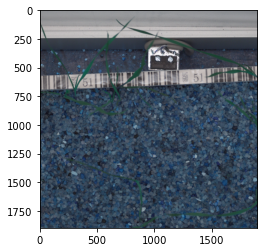

In [15]:
import PIL
import cv2
from matplotlib import pyplot as plt
path = './plant-seedlings-classification/train/Black-grass/0ace21089.png'
img = cv2.imread(path) 
plt.imshow(img)


In [75]:
import numpy as np
from torchvision import transforms
from PIL import Image

trans = transforms.Compose([
    transforms.ToTensor()
])

demo = Image.open('./plant-seedlings-classification/train/Black-grass/0ace21089.png') 
demo_img = trans(demo)

print(demo.size)
print(demo_img.size())


(1900, 1899)
torch.Size([3, 1899, 1900])


### 1.4 Model analysis

In [73]:
from torchsummary import summary
from torchvision import models
model = models.resnet50(pretrained=True)
model2 = models.vgg16(pretrained=True)
summary(model, (3, 480, 480))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 240, 240]           9,408
       BatchNorm2d-2         [-1, 64, 240, 240]             128
              ReLU-3         [-1, 64, 240, 240]               0
         MaxPool2d-4         [-1, 64, 120, 120]               0
            Conv2d-5         [-1, 64, 120, 120]           4,096
       BatchNorm2d-6         [-1, 64, 120, 120]             128
              ReLU-7         [-1, 64, 120, 120]               0
            Conv2d-8         [-1, 64, 120, 120]          36,864
       BatchNorm2d-9         [-1, 64, 120, 120]             128
             ReLU-10         [-1, 64, 120, 120]               0
           Conv2d-11        [-1, 256, 120, 120]          16,384
      BatchNorm2d-12        [-1, 256, 120, 120]             512
           Conv2d-13        [-1, 256, 120, 120]          16,384
      BatchNorm2d-14        [-1, 256, 1

In [74]:
summary(model2, (3, 480, 480))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 480, 480]           1,792
              ReLU-2         [-1, 64, 480, 480]               0
            Conv2d-3         [-1, 64, 480, 480]          36,928
              ReLU-4         [-1, 64, 480, 480]               0
         MaxPool2d-5         [-1, 64, 240, 240]               0
            Conv2d-6        [-1, 128, 240, 240]          73,856
              ReLU-7        [-1, 128, 240, 240]               0
            Conv2d-8        [-1, 128, 240, 240]         147,584
              ReLU-9        [-1, 128, 240, 240]               0
        MaxPool2d-10        [-1, 128, 120, 120]               0
           Conv2d-11        [-1, 256, 120, 120]         295,168
             ReLU-12        [-1, 256, 120, 120]               0
           Conv2d-13        [-1, 256, 120, 120]         590,080
             ReLU-14        [-1, 256, 1